# Rectangular Planar Array

This is an example to visualize the antenna array patterns with `antarray` module

In [1]:
import numpy as np
from scipy import signal


In [2]:
import antarray


## Create a `RectArray` object

---

Parameters
----------
- `sizex` : int
    - Size of the rectangular array on x-axis
- `sizey` : int, optional
    - Size of the rectangular array on y-axis (default is 1)
- `spacingx` : float, optional
    - Spacing between antenna elements on x-axis (Normalized to wavelength), (default is 0.5)
- `spacingy` : float, optional
    - Spacing between antenna elements on y-axis (Normalized to wavelength), (default is 0.5)

In [3]:
rect_array = antarray.RectArray(sizex=32, sizey=8, spacingx=0.5, spacingy=0.5)


Text(0.5, 1.0, 'Array layout')

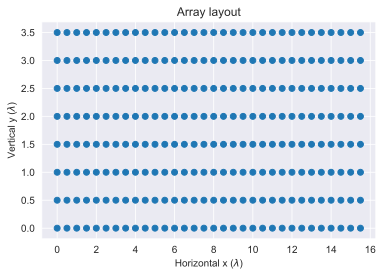

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_style('darkgrid')

plt.scatter(rect_array.x, rect_array.y)
plt.xlabel(r'Horizontal x ($\lambda$)')
plt.ylabel(r'Vertical y ($\lambda$)')
plt.title('Array layout')


## Get 3D pattern

---

Parameters
----------
- `nfft_az` : int, optional
    - FFT points for azimuth beamforming. Azimuth is the plane of x. (default is 512)
- `nfft_el` : int, optional
    - FFT points for elevation beamforming. Elevation is the plane of y. (default is 512)
- `beam_az` : float, optional
    - Angle of the main beam (deg) on azimuth. (default is 0)
- `beam_el` : float, optional
    - Angle of the main beam (deg) on elevation. (default is 0)
- `windowx` : str, optional
    - Window type along x axis, supports `Square`, `Chebyshev`, `Taylor`, `Hamming`, and, `Hanning` (default is `Square`)
- `sllx` : float, optional
    - Desired peak sidelobe level in decibels (dB) relative to the mainlobe for window along x axis. Only valid with Chebyshev window and Taylor window. (default is -60)
- `nbarx` : int, optional
    - Number of nearly constant level sidelobes adjacent to the mainlobe along x axis. Only works with Taylor window. (default is 4)
- `windowy` : str, optional
    - Window type along y axis, supports `Square`, `Chebyshev`, `Taylor`, `Hamming`, and, `Hanning` (default is `Square`)
- `slly` : float, optional
    - Desired peak sidelobe level in decibels (dB) relative to the mainlobe for window along y axis. Only valid with Chebyshev window and Taylor window. (default is -60)
- `nbary` : int, optional
    - Number of nearly constant level sidelobes adjacent to the mainlobe along y axis. Only works with Taylor window. (default is 4)
- `plot_az` : float, optional
    - If `nfft_az == 1`, `plot_az` indicates the azimuth angle of the returned elevation pattern. (default `plot_az = beam_az`)
- `plot_el` : float, optional
    - If `nfft_el == 1`, `plot_el` indicates the elevation angle of the returned azimuth pattern. (default `plot_el = beam_el`)

Returns
-------
- dict(
    - 'array_factor' : 1-D array or 2-D array
        - Antenna array pattern.
    - 'weight' : 2-D array
        - Weights for array elements
    - 'azimuth' : 1-D array
        - Corresponded azimuth angles for `array_factor
    - 'elevation' : 1-D array
        - Corresponded elevation angles for `array_factor
)


In [5]:
pattern = rect_array.get_pattern(256, 256, beam_az=40, beam_el=10)


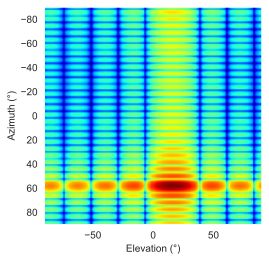

In [6]:
AF = 20*np.log10(np.abs(pattern['array_factor'])+0.0001)

plt.imshow(AF, extent=[-90, 90, 90, -90], cmap='jet')
plt.xlabel('Elevation (°)')
plt.ylabel('Azimuth (°)')
plt.grid(False)


## Update array parameters

---
Parameters
----------
- `sizex` : int, optional
    - Size of the rectangular array on x-axis
- `sizey` : int, optional
    - Size of the rectangular array on y-axis
- `spacingx` : float, optional
    - Spacing between antenna elements on x-axis (Normalized to wavelength)
- `spacingy` : float, optional
    - Spacing between antenna elements on y-axis (Normalized to wavelength)

Text(0.5, 1.0, 'Array layout')

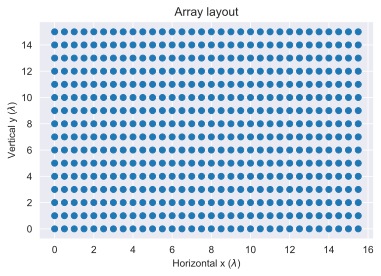

In [7]:
rect_array.update_parameters(sizey=16, spacingy=1)

plt.scatter(rect_array.x, rect_array.y)
plt.xlabel(r'Horizontal x ($\lambda$)')
plt.ylabel(r'Vertical y ($\lambda$)')
plt.title('Array layout')


In [8]:
pattern = rect_array.get_pattern(256, 256, beam_az=40, beam_el=10,
                                 windowx='Chebyshev', sllx=-70, windowy='Chebyshev', slly=-50)


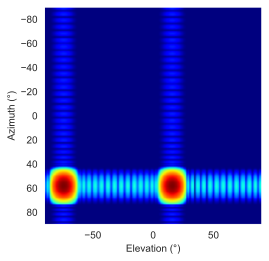

In [9]:
AF = 20*np.log10(np.abs(pattern['array_factor'])+0.0001)

plt.imshow(AF, extent=[-90, 90, 90, -90], cmap='jet')
plt.xlabel('Elevation (°)')
plt.ylabel('Azimuth (°)')
plt.grid(False)
